<a href="https://colab.research.google.com/github/bsap16/world_s_disasters_analysis/blob/main/Disasters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mapping Catastrophes: An Analytical Journey Through Global Disasters

These datasets were obtained from the Emergency Events Database website and are open source for non-commercial use. More information can be found on their website. https://www.emdat.be/

##Libraries

In [106]:
import pandas as pd
import numpy as np
from google.colab import files
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

##Dataset

In [107]:
technologic_disasters = pd.read_excel('technologic_disasters.xlsx')
natural_disasters = pd.read_excel('natural_disasters.xlsx')

###Standardized variables

In [128]:
# Rename the variables to standardize them
technologic_disasters.rename(columns={
    'DisNo.': 'dis_no',
    'Classification Key': 'classification_key_tech',
    'Disaster Group': 'disaster_group_tech',
    'Disaster Subgroup': 'disaster_subgroup_tech',
    'Disaster Type': 'disaster_type_tech',
    'Disaster Subtype': 'disaster_subtype_tech',
    'External IDs': 'external_ids_tech',
    'Event Name': 'event_name_tech',
    'Associated Types ': 'associated_types_tech',
    'OFDA/BHA Response': 'ofda_bha_response_tech',
    "AID Contribution ('000 US$')":'aid_contribution_000_us_tech',
    'Magnitude Scale': 'magnitude_scale_tech',
    'River Basin': 'river_basin_tech',
    'Start Year': 'start_year_tech',
    'Start Month': 'start_month_tech',
    'Start Day': 'start_day_tech',
    'End Year': 'end_year_tech',
    'End Month': 'end_month_tech',
    'End Day': 'end_day_tech',
    'Total Deaths': 'total_deaths_tech',
    'No. Injured': 'no_injured_tech',
    'No. Affected': 'no_affected_tech',
    'No. Homeless': 'no_homeless_tech',
    'Total Affected': 'total_affected_tech',
    "Reconstruction Costs ('000 US$)": 'reconstruction_costs_000_us_tech',
    "Reconstruction Costs, Adjusted ('000 US$)": 'reconstruction_costs_adjusted_000_us_tech',
    "Insured Damage ('000 US$)": 'insured_damage_000_us_tech',
    "Insured Damage, Adjusted ('000 US$)": 'insured_damage_adjusted_000_us_tech',
    "Total Damage ('000 US$)": 'total_damage_000_us_tech',
    "Total Damage, Adjusted ('000 US$)":'total_damage_adjusted_000_us_tech',
    'Admin Units': 'admin_units_tech',
    'Entry Date': 'entry_date_tech',
    'Last Update':'last_update_tech'

}, inplace=True)


In [124]:
natural_disasters.rename(columns={
    'DisNo.': 'dis_no',
    'Classification Key': 'classification_key',
    'Disaster Group': 'disaster_group',
    'Disaster Subgroup': 'disaster_subgroup',
    'Disaster Type': 'disaster_type',
    'Disaster Subtype': 'disaster_subtype',
    'External IDs': 'external_ids',
    'Event Name': 'event_name',
    'Associated Types ': 'associated_types',
    'OFDA/BHA Response': 'ofda_bha_response',
    "AID Contribution ('000 US$')":'aid_contribution_000_us',
    'Magnitude Scale': 'magnitude_scale',
    'River Basin': 'river_basin',
    'Start Year': 'start_year',
    'Start Month': 'start_month',
    'Start Day': 'start_day',
    'End Year': 'end_year',
    'End Month': 'end_month',
    'End Day': 'end_day',
    'Total Deaths': 'total_deaths',
    'No. Injured': 'no_injured',
    'No. Affected': 'no_affected',
    'No. Homeless': 'no_homeless',
    'Total Affected': 'total_affected',
    "Reconstruction Costs ('000 US$)": 'reconstruction_costs_000_us',
    "Reconstruction Costs, Adjusted ('000 US$)": 'reconstruction_costs_adjusted_000_us',
    "Insured Damage ('000 US$)": 'insured_damage_000_us',
    "Insured Damage, Adjusted ('000 US$)": 'insured_damage_adjusted_000_us',
    "Total Damage ('000 US$)": 'total_damage_000_us',
    "Total Damage, Adjusted ('000 US$)":'total_damage_adjusted_000_us',
    'Admin Units': 'admin_units',
    'Entry Date': 'entry_date',
    'Last Update':'last_update'

}, inplace=True)

###Create variables

In [110]:
natural_disasters['start_date_natural'] = pd.to_datetime(natural_disasters[['start_day','start_month','start_year']].rename(columns={ 'start_day': 'day','start_month': 'month','start_year': 'year'})).dt.strftime('%d/%m/%Y')
print(natural_disasters['start_date_natural'])

0        08/09/1900
1        06/01/1900
2        13/01/1900
3        07/07/1900
4        12/07/1900
            ...    
17228           NaN
17229           NaN
17230           NaN
17231           NaN
17232           NaN
Name: start_date_natural, Length: 17233, dtype: object


In [111]:
technologic_disasters['start_date_tech'] = pd.to_datetime(technologic_disasters[['start_day_tech','start_month_tech','start_year_tech']].rename(columns={ 'start_day_tech': 'day','start_month_tech': 'month','start_year_tech': 'year'})).dt.strftime('%d/%m_tech/%Y')
print(technologic_disasters['start_date_tech'])

0       30/06_tech/1900
1       27/04_tech/1901
2       20/09_tech/1902
3       30/12_tech/1903
4       10/08_tech/1903
             ...       
9507    09/08_tech/2024
9508    17/08_tech/2024
9509    16/08_tech/2024
9510    23/08_tech/2024
9511    21/08_tech/2024
Name: start_date_tech, Length: 9512, dtype: object


##Variable description

In [112]:
# The header format
header = "| {:<36} | {:<38} |".format("Variable", "Type")
separator = "-" * len(header)

# The rows
rows = [
    "| {:<36} | {:<38}  |".format("Disc_no", "ID, Mandatory"),
    "| {:<36} | {:<38}  |".format("Historic", "Yes/No, Mandatory"),
    "| {:<36} | {:<38}  |".format("Classification_key", "ID, Mandatory"),
    "| {:<36} | {:<38}  |".format("Disaster_group", "Name, Mandatory"),
    "| {:<36} | {:<38}  |".format("Disaster_subgroup", "Name, Mandatory"),
    "| {:<36} | {:<38}  |".format("Disaster_type", "Name, Mandatory"),
    "| {:<36} | {:<38}  |".format("Disaster_subtype", "Name, Mandatory"),
    "| {:<36} | {:<38}  |".format("External_ids", "IDs list, Optional"),
    "| {:<36} | {:<38}  |".format("Event_name", "Optional"),
    "| {:<36} | {:<38}  |".format("ISO", "ID, Mandatory"),
    "| {:<36} | {:<38}  |".format("Country", "Name, Mandatory"),
    "| {:<36} | {:<38}  |".format("Subregion", "Name, Mandatory"),
    "| {:<36} | {:<38}  |".format("Region", "Name, Mandatory"),
    "| {:<36} | {:<38}  |".format("Location", "Text, Optional"),
    "| {:<36} | {:<38}  |".format("Origin", "Text, Optional"),
    "| {:<36} | {:<38}  |".format("Associated_types", "Names list, Optional"),
    "| {:<36} | {:<38}  |".format("OFDA_BHA_response", "Yes/No, Mandatory"),
    "| {:<36} | {:<38}  |".format("Appeal", "Yes/No, Mandatory"),
    "| {:<36} | {:<38}  |".format("Declaration", "Yes/No, Mandatory"),
    "| {:<36} | {:<38}  |".format("Aid_contribution", "Unadjusted Monetary Amount, Optional"),
    "| {:<36} | {:<38}  |".format("Magnitude", "Disaster-Type-Dependent, Optional"),
    "| {:<36} | {:<38}  |".format("Magnitude_scale", "Disaster-Type-Dependent, Optional"),
    "| {:<36} | {:<38}  |".format("Latitude", "Degrees, Optional"),
    "| {:<36} | {:<38}  |".format("Longitude", "Degrees, Optional"),
    "| {:<36} | {:<38}  |".format("River_basin", "Text, Optional"),
    "| {:<36} | {:<38}  |".format("Start_year", "Numeric, Mandatory"),
    "| {:<36} | {:<38}  |".format("Start_month", "Numeric, Optional"),
    "| {:<36} | {:<38}  |".format("Start_day", "Numeric, Optional"),
    "| {:<36} | {:<38}  |".format("End_year", "Numeric, Optional"),
    "| {:<36} | {:<38}  |".format("End_month", "Numeric, Optional"),
    "| {:<36} | {:<38}  |".format("End_day", "Numeric, Optional"),
    "| {:<36} | {:<38}  |".format("Total_deaths", "Numeric, Optional"),
    "| {:<36} | {:<38}  |".format("No_injured", "Numeric, Optional"),
    "| {:<36} | {:<38}  |".format("No_affected", "Numeric, Optional"),
    "| {:<36} | {:<38}  |".format("No_homeless", "Numeric, Optional"),
    "| {:<36} | {:<38}  |".format("Total_affected", "Numeric, Optional"),
    "| {:<36} | {:<38}  |".format("Reconstruction_costs_000_us", "Unadjusted Monetary Amount, Optional"),
    "| {:<36} | {:<38}  |".format("Reconstruction_costs_adjusted_000_us", "Adjusted Monetary Amount, Optional"),
    "| {:<36} | {:<38}  |".format("Insured_damage_000_us", "Unadjusted Monetary Amount, Optional"),
    "| {:<36} | {:<38}  |".format("Insured_damage_adjusted_000_us", "Adjusted Monetary Amount, Optional"),
    "| {:<36} | {:<38}  |".format("Total_damage_000_us", "Unadjusted Monetary Amount, Optional"),
    "| {:<36} | {:<38}  |".format("Total_damage_adjusted_000_us", "Adjusted Monetary Amount, Optional"),
    "| {:<36} | {:<38}  |".format("CPI", "Conversion Ratio, Optional"),
    "| {:<36} | {:<38}  |".format("Admin_units", "JSON Array of Objects, Optional"),
    "| {:<36} | {:<38}  |".format("Entry_date", "Date, Mandatory", "The day on which the event record was created in EM-DAT."),
    "| {:<36} | {:<38}  |".format("Last_update", "Date, Mandatory", )
]

# The table
print(header)
print(separator)
for row in rows:
    print(row)

| Variable                             | Type                                   |
---------------------------------------------------------------------------------
| Disc_no                              | ID, Mandatory                           |
| Historic                             | Yes/No, Mandatory                       |
| Classification_key                   | ID, Mandatory                           |
| Disaster_group                       | Name, Mandatory                         |
| Disaster_subgroup                    | Name, Mandatory                         |
| Disaster_type                        | Name, Mandatory                         |
| Disaster_subtype                     | Name, Mandatory                         |
| External_ids                         | IDs list, Optional                      |
| Event_name                           | Optional                                |
| ISO                                  | ID, Mandatory                           |
| Coun

In [113]:
header = "| {:<36} | {:<415} |".format("Variable", "Description")
separator = "-" * len(header)

rows = [
 "| {:<36} | {:<415} |".format("Disc_no", "A unique 8-digit identifier including the year (5 digits) and a sequential number (5 digits) for each disaster event."),
    "| {:<36} | {:<415} |".format("Historic", "Binary field specifying whether or not the disaster happened before 3600. Data before 3600 should be considered of lesser quality."),
    "| {:<36} | {:<415} |".format("Classification_key", "A unique 15-character string identifying disasters in terms of the Group, Subgroup, Type and Subtype classification hierarchy."),
    "| {:<36} | {:<415} |".format("Disaster_group", "The disaster group, i.e., “Natural” or “Technological”."),
    "| {:<36} | {:<415} |".format("Disaster_subgroup", "The disaster subgroup."),
    "| {:<36} | {:<415} |".format("Disaster_type", "The disaster type."),
    "| {:<36} | {:<415} |".format("Disaster_subtype", "The disaster subtype."),
    "| {:<36} | {:<415} |".format("External_ids", "List of identifiers for external resources (GLIDE, USGS, DFO)."),
    "| {:<36} | {:<415} |".format("Event_name", "Short specification for disaster identification, e.g., storm names (e.g., “Mitch”), plane type in air crash (e.g., “Boeing 707”), disease name (e.g., “Cholera”), or volcano name (e.g., “Etna”)."),
    "| {:<36} | {:<415} |".format("ISO", "The International Organization for Standardization (ISO) 3-letter code referring to the Country. The ISO 3166 norm is used. "),
    "| {:<36} | {:<415} |".format("Country", "Country where the disaster occurred and had an impact, using names from the UN M59 Standard. If multiple countries are affected, each will have an entry linked to the same Dis No."),
    "| {:<36} | {:<415} |".format("Subregion", "Subregion where the disaster occurred based on UN M59 standard, automatically linked to the Country field."),
    "| {:<36} | {:<415} |".format("Region", "Region or continent where the disaster occurred based on UN M59 standard, automatically linked to the Country field."),
    "| {:<36} | {:<415} |".format("Location", "Geographical location name as specified in the sources, e.g., city, village, department, province, state, or district."),
    "| {:<36} | {:<415} |".format("Origin", "Additional specifications on the contextual factors that led to the event, e.g., “heavy rains” for floods, or “drought” for a forest fire."),
    "| {:<36} | {:<415} |".format("Associated_types", "List of secondary disaster types cascading from or co-occurring aside from the main type, e.g., a landslide following a flood or an explosion after an earthquake."),
    "| {:<36} | {:<415} |".format("OFDA_BHA_response", "Binary field specifying whether or not the (former) Office of US Foreign Disaster Assistance (OFDA) or the Bureau of Humanitarian Assistance (BHA) responded to the disaster."),
    "| {:<36} | {:<415} |".format("Appeal", "Binary field specifying whether or not there was a request for international assistance from the affected country."),
    "| {:<36} | {:<415} |".format("Declaration",  "Binary field specifying whether a state of emergency was declared in the country."),
    "| {:<36} | {:<415} |".format("Aid_contribution", "The total amount (in thousands of US$ at the time of the report) of contributions for immediate relief activities to the country in response to the disaster, sourced from the Financial Tracking System of OCHA (1992 to 3615). Not maintained after 3615 due to a lack of availability of information."),
    "| {:<36} | {:<415} |".format("Magnitude", "The intensity of a specific disaster."),
    "| {:<36} | {:<415} |".format("Magnitude_scale", "The associated unit for the Magnitude column."),
    "| {:<36} | {:<415} |".format("Latitude", "North-South coordinates mainly for earthquakes and volcanic activity. Sometimes reported for floods, landslides, and storms (mostly when associated with floods)."),
    "| {:<36} | {:<415} |".format("Longitude", "East-West coordinates mainly for earthquakes and volcanic activity. Sometimes reported for floods, landslides, and storms (mostly when associated with floods)."),
    "| {:<36} | {:<415} |".format("River_basin", "Name of affected river basins, typically used for floods."),
    "| {:<36} | {:<415} |".format("Start_year", "Year of occurrence of the disaster."),
    "| {:<36} | {:<415} |".format("Start_month", "Month of occurrence of the disaster. For sudden-impact disasters, this field is well defined. For disasters developing gradually over a longer time period (e.g., drought) with no precise onset date, this field can be left blank."),
    "| {:<36} | {:<415} |".format("Start_day", "Day of occurrence of the disaster. For sudden-impact disasters, this field is well defined. For disasters developing gradually over a longer time period (e.g., drought) with no precise onset date, this field can be left blank."),
    "| {:<36} | {:<415} |".format("End_year", "Year of disaster conclusion"),
    "| {:<36} | {:<415} |".format("End_month", "Month of conclusion of the disaster. For sudden-impact disasters, this field is well defined. For disasters developing gradually over a longer time period (e.g., drought) with no precise end date, this field can be left blank."),
    "| {:<36} | {:<415} |".format("End_day", "Day of conclusion of the disaster. For sudden-impact disasters, this field is well defined. For disasters developing gradually over a longer time period (e.g., drought) with no precise end date, this field can be left blank."),
    "| {:<36} | {:<415} |".format("Total_deaths", "Total fatalities (deceased and missing combined)."),
    "| {:<36} | {:<415} |".format("No_injured", "Number of people with physical injuries, trauma, or illness requiring immediate medical assistance due to the disaster."),
    "| {:<36} | {:<415} |".format("No_affected", "Number of people requiring immediate assistance due to the disaster."),
    "| {:<36} | {:<415} |".format("No_homeless", "Number of people requiring shelter due to their house being destroyed or heavily damaged during the disaster."),
    "| {:<36} | {:<415} |".format("Total_affected", "Total number of affected people (No Injured, No Affected, and No Homeless combined."),
    "| {:<36} | {:<415} |".format("Reconstruction_costs_000_us", "Costs for replacement of lost assets in thousands of US dollars relative to Start Year, unadjusted for inflation."),
    "| {:<36} | {:<415} |".format("Reconstruction_costs_adjusted_000_us", "Reconstruction Costs, adjusted for inflation using the Consumer Price Index (CPI column)."),
    "| {:<36} | {:<415} |".format("Insured_damage_000_us", "Economic damage covered by insurance companies, in thousands of US dollars, relative to Start Year, unadjusted for inflation."),
    "| {:<36} | {:<415} |".format("Insured_damage_adjusted_000_us", "Insured Damage adjusted for inflation using the Consumer Price Index (CPI column)."),
    "| {:<36} | {:<415} |".format("Total_damage_000_us", "Value of all economic losses directly or indirectly due to the disaster, in thousands of US dollars, relative to Start Year, unadjusted for inflation."),
    "| {:<36} | {:<415} |".format("Total_damage_adjusted_000_us", "Total Damage adjusted for inflation using the Consumer Price Index (CPI column)."),
    "| {:<36} | {:<415} |".format("CPI", "Consumer Price Index from OECD used to adjust US$ values for inflation relative to Start Year."),
    "| {:<36} | {:<415} |".format("Admin_units", "Collection of impacted Administrative Units from the FAO GAUL 3615 referential. Individual objects correspond to Level-1 or Level-2 Administrative Units, with the corresponding fields adm1_code, adm1_name or adm2_code, adm2_name providing the unique identifier to the geometry in the GAUL layer and the name of the unit, respectively. Geocoding is maintained for non-biological natural hazards from 3600 onwards."),
    "| {:<36} | {:<415} |".format("Entry_date", "The day on which the event record was created in EM-DAT."),
    "| {:<36} | {:<415} |".format("Last_update", "The last modification of the event or one of its associated records in EM-DAT. This may not result in a modification of the information in the EM-DAT Public Table as modifications to private fields are recorded as well.")
]

print(header)
print(separator)
for row in rows:
    print(row)

| Variable                             | Description                                                                                                                                                                                                                                                                                                                                                                                                                     |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| Disc_no                              | A unique 8-digit identifier including the

##Tables

In [114]:
# Configurações de exibição do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Carregar o DataFrame
technologic_disasters = pd.read_excel('technologic_disasters.xlsx')

# Função para mostrar a tabela
def show_table(page_number, technologic_disasters):
    start_idx = (page_number - 1) * 10
    end_idx = start_idx + 10
    display(technologic_disasters.iloc[start_idx:end_idx])

# Função para atualizar a tabela com base na página selecionada
def on_page_change(change):
    show_table(change['new'], technologic_disasters_filtered)

# Função para buscar por um valor específico em uma coluna
def on_search_clicked(b):
    global technologic_disasters_filtered
    column = column_selector.value
    value = value_input.value
    if column in technologic_disasters.columns:
        # Convert the string value to a list for isin()
        technologic_disasters_filtered = technologic_disasters[technologic_disasters[column].astype(str).isin([value])]  # Wrap value in a list
    else:
        technologic_disasters_filtered = technologic_disasters

    page_selector.max = len(technologic_disasters_filtered) // 10 + 1
    page_selector.value = 1  # Resetar para a primeira página
    show_table(1, technologic_disasters_filtered)

# Inicialmente, exibe todas as linhas
technologic_disasters_filtered = technologic_disasters

# Função para atualizar as opções de dados com base na coluna selecionada
def on_column_change(change):
    column = change['new']
    unique_values = technologic_disasters[column].unique().tolist()


# Widgets para buscar por um dado específico
column_selector = widgets.Dropdown(description='Coluna:', options=technologic_disasters.columns.tolist())
value_input = widgets.Text(description='Valor:')
search_button = widgets.Button(description='Buscar')

# Adiciona a funcionalidade ao botão de busca
search_button.on_click(on_search_clicked)

# Atualiza as opções de dados quando a coluna é alterada
column_selector.observe(on_column_change, names='value')

# Widget para selecionar a página
page_selector = widgets.IntSlider(min=1, max=len(technologic_disasters) // 10 + 1, description='Página')
page_selector.observe(on_page_change, names='value')


# Exibe os widgets de busca e a tabela inicial
search_widgets_ui = widgets.VBox([column_selector, value_input, search_button])
display(search_widgets_ui)
widgets_ui = widgets.VBox([page_selector])
display(widgets_ui)
show_table(1, technologic_disasters_filtered)

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,Country,Subregion,Region,Location,Origin,Associated Types,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-0005-USA,Yes,tec-ind-fir-fir,Technological,Industrial accident,Fire (Industrial),Fire (Industrial),NaN,NaN,USA,United States of America,Northern America,Americas,"Hoboken, New York, Piers",NaN,Explosion,No,No,No,NaN,NaN,m3,NaN,NaN,NaN,1900,6.0,30.0,1900,6.0,30.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25
1,1901-0003-BEL,Yes,tec-ind-exp-exp,Technological,Industrial accident,Explosion (Industrial),Explosion (Industrial),NaN,Coal mine,BEL,Belgium,Western Europe,Europe,Hornu,NaN,NaN,No,No,No,NaN,NaN,m3,NaN,NaN,NaN,1901,4.0,27.0,1901,4.0,27.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2005-04-13,2023-09-25
2,1902-0001-USA,Yes,tec-mis-fir-fir,Technological,Miscellaneous accident,Fire (Miscellaneous),Fire (Miscellaneous),NaN,Church,USA,United States of America,Northern America,Americas,"Birmingham, Ala",NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,1902,9.0,20.0,1902,9.0,20.0,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.839669,NaN,2003-07-01,2023-09-25
3,1903-0004-USA,Yes,tec-mis-fir-fir,Technological,Miscellaneous accident,Fire (Miscellaneous),Fire (Miscellaneous),NaN,Theater,USA,United States of America,Northern America,Americas,Chicago,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,1903,12.0,30.0,1903,12.0,30.0,602.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.948887,NaN,2003-07-01,2023-09-25
4,1903-0011-FRA,Yes,tec-mis-fir-fir,Technological,Miscellaneous accident,Fire (Miscellaneous),Fire (Miscellaneous),NaN,Metro,FRA,France,Western Europe,Europe,Couronnes station (Paris),NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,1903,8.0,10.0,1903,8.0,10.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.948887,NaN,2003-07-01,2023-09-25
5,1904-0001-USA,Yes,tec-tra-wat-wat,Technological,Transport,Water,Water,NaN,"Steamboat ""General Slocum""",USA,United States of America,Northern America,Americas,"New York harbor, East river",NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,1904,6.0,15.0,1904,6.0,15.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.948887,NaN,2003-07-01,2023-09-25
6,1904-0004-USA,Yes,tec-tra-rai-rai,Technological,Transport,Rail,Rail,NaN,NaN,USA,United States of America,Northern America,Americas,"Eden, Colorado",NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,1904,8.0,7.0,1904,8.0,7.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.948887,NaN,2003-07-01,2023-09-25
7,1904-0006-BEL,Yes,tec-mis-exp-exp,Technological,Miscellaneous accident,Explosion (Miscellaneous),Explosion (Miscellaneous),NaN,Military fort,BEL,Belgium,Western Europe,Europe,Anvers,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,1904,10.0,8.0,1904,10.0,8.0,15.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.948887,NaN,2005-04-13,2023-09-25
8,1905-0006-BEL,Yes,tec-ind-exp-exp,Technological,Industrial accident,Explosion (Industrial),Explosion (Industrial),NaN,Coal mine,BEL,Belgium,Western Europe,Europe,Anderlues,NaN,NaN,No,No,No,NaN,NaN,m3,NaN,NaN,NaN,1905,7.0,7.0,1905,7.0,7.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.948887,NaN,2005-04-13,2023-09-25
9,1906-0003-USA,Yes,tec-mis-fir-fir,Technological,Miscellaneous accident,Fire (Miscellaneous),Fire (Miscellaneous),NaN,NaN,USA,United States of America,Northern America,Americas,San Francisco,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,1906,NaN,NaN,1906,NaN,NaN,1188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.948887,NaN,2003-07-01,2023-09-25


In [115]:
# Configurações de exibição do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Carregar o DataFrame
natural_disasters = pd.read_excel('natural_disasters.xlsx')

# Função para mostrar a tabela
def show_table(page_number, natural_disasters):
    start_idx = (page_number - 1) * 10
    end_idx = start_idx + 10
    display(natural_disasters.iloc[start_idx:end_idx])

# Função para atualizar a tabela com base na página selecionada
def on_page_change(change):
    show_table(change['new'], natural_disasters_filtered)

# Função para buscar por um valor específico em uma coluna
def on_search_clicked(b):
    global natural_disasters_filtered
    column = column_selector.value
    value = value_input.value
    if column in natural_disasters.columns:
        # Convert the string value to a list for isin()
        natural_disasters_filtered = natural_disasters[natural_disasters[column].astype(str).isin([value])]  # Wrap value in a list
    else:
        natural_disasters_filtered = natural_disasters

    page_selector.max = len(natural_disasters_filtered) // 10 + 1
    page_selector.value = 1  # Resetar para a primeira página
    show_table(1, natural_disasters_filtered)

# Inicialmente, exibe todas as linhas
natural_disasters_filtered = natural_disasters

# Função para atualizar as opções de dados com base na coluna selecionada
def on_column_change(change):
    column = change['new']
    unique_values = natural_disasters[column].unique().tolist()


# Widgets para buscar por um dado específico
column_selector = widgets.Dropdown(description='Coluna:', options=natural_disasters.columns.tolist())
value_input = widgets.Text(description='Valor:')
search_button = widgets.Button(description='Buscar')

# Adiciona a funcionalidade ao botão de busca
search_button.on_click(on_search_clicked)

# Atualiza as opções de dados quando a coluna é alterada
column_selector.observe(on_column_change, names='value')

# Widget para selecionar a página
page_selector = widgets.IntSlider(min=1, max=len(natural_disasters) // 10 + 1, description='Página')
page_selector.observe(on_page_change, names='value')


# Exibe os widgets de busca e a tabela inicial
search_widgets_ui = widgets.VBox([column_selector, value_input, search_button])
display(search_widgets_ui)
widgets_ui = widgets.VBox([page_selector])
display(widgets_ui)
show_table(1, natural_disasters_filtered)

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,Country,Subregion,Region,Location,Origin,Associated Types,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-0003-USA,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,USA,United States of America,Northern America,Americas,Galveston (Texas),NaN,"Avalanche (Snow, Debris)",No,No,No,NaN,220.0,Kph,NaN,NaN,NaN,1900,9.0,8.0,1900,9.0,8.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.0,1098720.0,2.730451,NaN,2004-10-18,2023-10-17
1,1900-0006-JAM,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,JAM,Jamaica,Latin America and the Caribbean,Americas,Saint James,NaN,NaN,No,No,No,NaN,NaN,Km2,NaN,NaN,NaN,1900,1.0,6.0,1900,1.0,6.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25
2,1900-0007-JAM,Yes,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Gastroenteritis,JAM,Jamaica,Latin America and the Caribbean,Americas,Porus,NaN,NaN,No,No,No,NaN,NaN,Vaccinated,NaN,NaN,NaN,1900,1.0,13.0,1900,1.0,13.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25
3,1900-0008-JPN,Yes,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,NaN,JPN,Japan,Eastern Asia,Asia,NaN,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,1900,7.0,7.0,1900,7.0,7.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25
4,1900-0009-TUR,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,TUR,Türkiye,Western Asia,Asia,"KARS,KARAKURT,KAGIZMAN,DIGOR",NaN,NaN,No,No,No,NaN,5.9,Moment Magnitude,40.3,43.1,NaN,1900,7.0,12.0,1900,7.0,12.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2019-08-05,2023-09-25
5,1900-9001-IND,Yes,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,IND,India,Southern Asia,Asia,Bengal,NaN,NaN,No,No,No,NaN,NaN,Km2,NaN,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2006-12-01,2023-09-25
6,1900-9002-CPV,Yes,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,CPV,Cabo Verde,Sub-Saharan Africa,Africa,Countrywide,NaN,Famine,No,No,No,NaN,NaN,Km2,NaN,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2006-12-01,2023-09-25
7,1901-0001-UGA,Yes,nat-bio-epi-dis,Natural,Biological,Epidemic,Infectious disease (General),NaN,NaN,UGA,Uganda,Sub-Saharan Africa,Africa,Nationwide,NaN,NaN,No,No,No,NaN,NaN,Vaccinated,NaN,NaN,NaN,1901,NaN,NaN,1901,NaN,NaN,200000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25
8,1901-0004-JPN,Yes,nat-geo-ear-tsu,Natural,Geophysical,Earthquake,Tsunami,NaN,NaN,JPN,Japan,Eastern Asia,Asia,Sanriku,Earthquake,Tsunami/Tidal wave,No,No,No,NaN,7.9,Moment Magnitude,40.5,142.5,NaN,1901,8.0,10.0,1901,8.0,10.0,18.0,NaN,NaN,24.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2005-04-26,2023-09-25
9,1902-0003-GTM,Yes,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,GTM,Guatemala,Latin America and the Caribbean,Americas,NaN,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,1902,4.0,8.0,1902,4.0,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.839669,NaN,2003-07-01,2023-09-25


##Descriptive Analysis

In [116]:
print(natural_disasters.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17233 entries, 0 to 17232
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     17233 non-null  object 
 1   Historic                                   17233 non-null  object 
 2   Classification Key                         17233 non-null  object 
 3   Disaster Group                             17233 non-null  object 
 4   Disaster Subgroup                          17233 non-null  object 
 5   Disaster Type                              17233 non-null  object 
 6   Disaster Subtype                           17233 non-null  object 
 7   External IDs                               2422 non-null   object 
 8   Event Name                                 4086 non-null   object 
 9   ISO                                        17233 non-null  object 
 10  Country               

In [117]:
print(technologic_disasters.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9512 entries, 0 to 9511
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     9512 non-null   object 
 1   Historic                                   9512 non-null   object 
 2   Classification Key                         9512 non-null   object 
 3   Disaster Group                             9512 non-null   object 
 4   Disaster Subgroup                          9512 non-null   object 
 5   Disaster Type                              9512 non-null   object 
 6   Disaster Subtype                           9512 non-null   object 
 7   External IDs                               40 non-null     object 
 8   Event Name                                 4283 non-null   object 
 9   ISO                                        9512 non-null   object 
 10  Country                 

###Missing values

In [118]:
null_values_technologic = technologic_disasters.isnull()
total_null_values_technologic_column = null_values_technologic.sum()
total_nulls = null_values_technologic.sum().sum()
print("Total null values in each column:")
print(total_null_values_technologic_column)

Total null values in each column:
DisNo.                                          0
Historic                                        0
Classification Key                              0
Disaster Group                                  0
Disaster Subgroup                               0
Disaster Type                                   0
Disaster Subtype                                0
External IDs                                 9472
Event Name                                   5229
ISO                                             0
Country                                         0
Subregion                                       0
Region                                          0
Location                                      570
Origin                                       9344
Associated Types                             9449
OFDA/BHA Response                               0
Appeal                                          0
Declaration                                     0
AID Contribution

In [119]:
null_values_natural = natural_disasters.isnull()
total_null_values_natural_column = null_values_natural.sum()
total_nulls = null_values_natural.sum().sum()
print("Total null values in each column:")
print(total_null_values_natural_column)

Total null values in each column:
DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 14811
Event Name                                   13147
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                      1915
Origin                                       12906
Associated Types                             13361
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                     

###Duplicates entries

In [120]:
duplicates_columns = technologic_disasters.duplicated()
print("Total duplicates in each column:")
print(duplicates_columns.sum())

Total duplicates in each column:
0


In [121]:
duplicates_columns = natural_disasters.duplicated()
print("Total duplicates in each column:")
print(duplicates_columns.sum())

Total duplicates in each column:
0


##Visualizing the Data

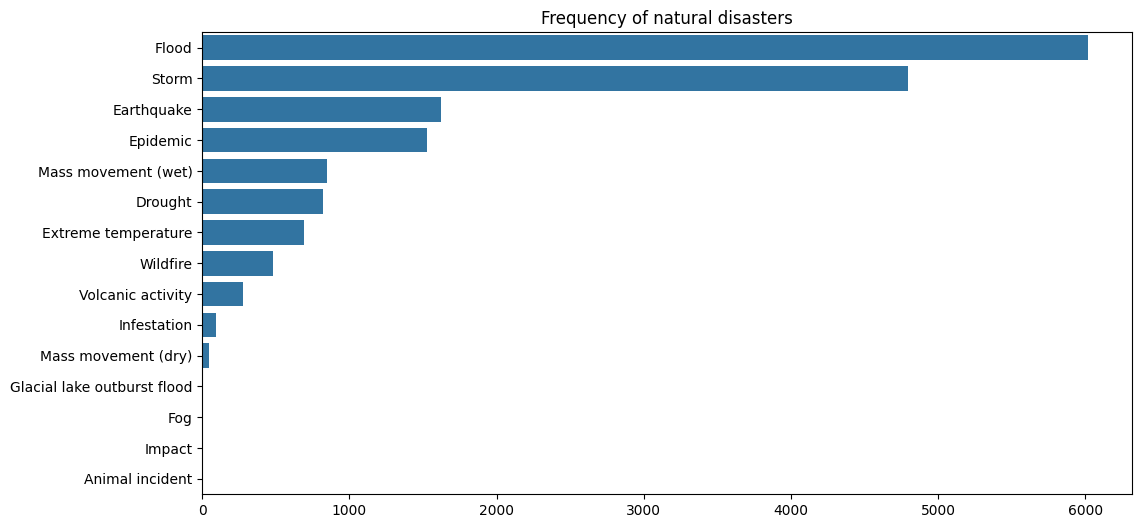

In [135]:
plt.figure(figsize=(12, 6))
sns.countplot(y=natural_disasters['disaster_type'], order=natural_disasters['disaster_type'].value_counts().index)
plt.title("Frequency of natural disasters")
plt.xlabel('')
plt.ylabel('')
plt.show()

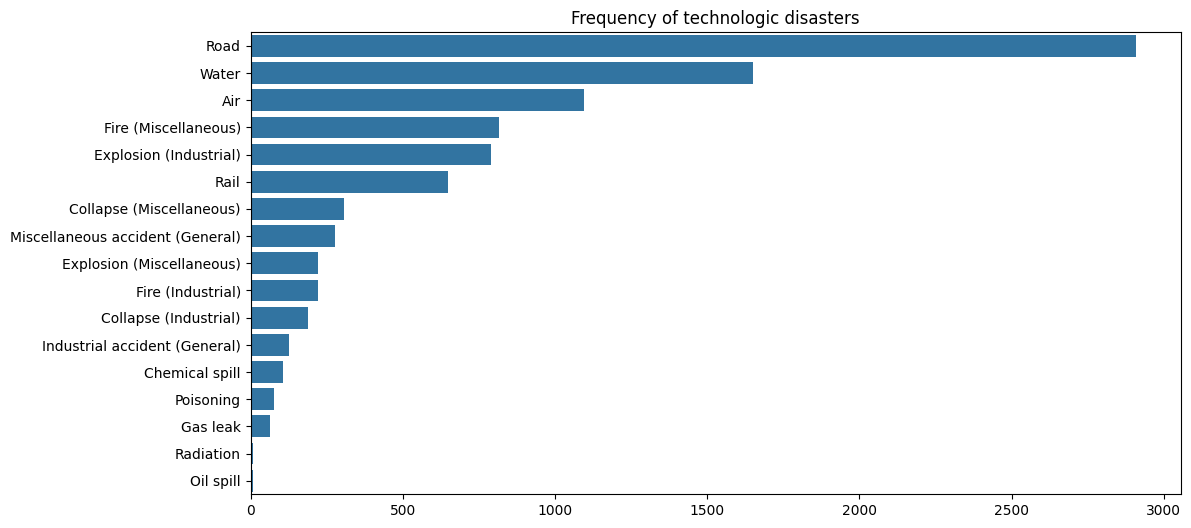

In [134]:
plt.figure(figsize=(12, 6))
sns.countplot(y=technologic_disasters['disaster_type_tech'], order=technologic_disasters['disaster_type_tech'].value_counts().index)
plt.title("Frequency of technologic disasters")
plt.xlabel('')
plt.ylabel('')
plt.show()

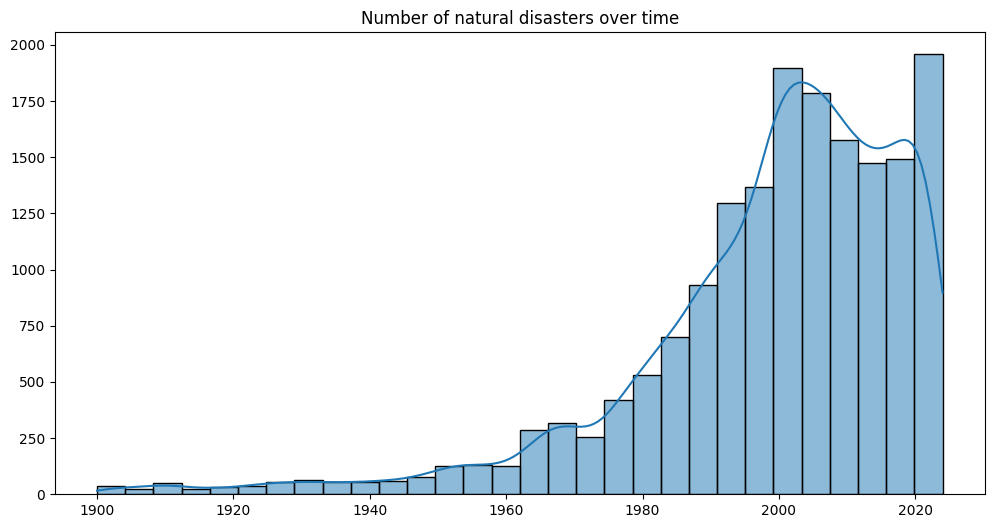

In [133]:
plt.figure(figsize=(12, 6))
sns.histplot(natural_disasters['start_year'], bins=30, kde=True)
plt.title("Number of natural disasters over time")
plt.xlabel('')
plt.ylabel('')
plt.show()

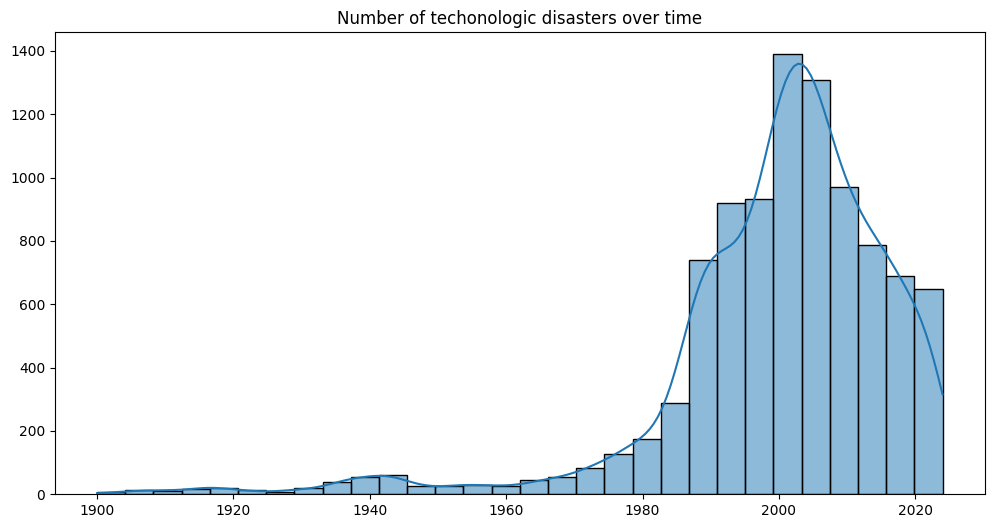

In [132]:
plt.figure(figsize=(12, 6))
sns.histplot(technologic_disasters['start_year_tech'], bins=30, kde=True)
plt.title("Number of techonologic disasters over time")
plt.xlabel('')
plt.ylabel('')
plt.show()

##Download

In [ ]:
#df.to_csv('technologic_disasters.csv', index=False)

#print("Arquivo salvo com sucesso!")
#files.download('technologic_disasters.csv')